<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Modelos_de_ML_Social_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
from time import time

from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
 
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [ ]:

# Importing the dataset
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values


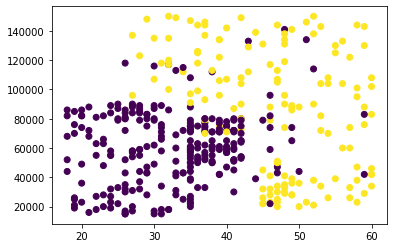

In [ ]:
dataset.head()
plt.scatter(x = dataset['Age'], y = dataset['EstimatedSalary'], c = dataset['Purchased'])
plt.show()

In [ ]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
 
#Nomes dos classificadores considerados
nome = [
    '5-Vizinhos Mais Próximos',
    '15-Vizinhos Mais Próximos',
    '25-Vizinhos Mais Próximos',
    '35-Vizinhos Mais Próximos',
    'Árvore de Decisão',
    'Regressão Logística', 
    'Análise Discriminante Linear',
    'Análise Discriminante Quadrática',
    'Bagging de Árvores',
    'Bagging de Regressão Logística',
    'Floresta Aleatória',
    'AdaBoost',
    'Extra Árvores',
    'Classificador Passivo Agressivo',
    'Gradient Boosting',
    'Gaussian Naive Bayes', 
    'Support Vector Machine (Linear)',
    'Support Vector Machine (RBF)',
    'Support Vector Machine (Poli.G3)',
    'Support Vector Machine (Sigmoid)',
    'Rede Neural Perceptron',
    'Rede Neural MLP (10)',
    'Rede Neural MLP (10,10)',
    'Rede Neural MLP (100)']

#Classificadores considerados
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    KNeighborsClassifier(n_neighbors = 15),
    KNeighborsClassifier(n_neighbors = 25),
    KNeighborsClassifier(n_neighbors = 35),
    DecisionTreeClassifier(),
    LogisticRegression(), 
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    PassiveAggressiveClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(), 
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'poly'),
    SVC(kernel = 'sigmoid'),
    Perceptron(),
    MLPClassifier(hidden_layer_sizes=(10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(10,10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(100), max_iter = 1000)]

In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1)
resultados = pd.DataFrame()

i = 1
t0 = time()

for i, modelo in enumerate(classifiers):
    print('Ajustando o modelo', nome[i])
    t = time()
    abc = cross_validate(modelo, X, Y, cv = validacao, scoring = ['accuracy', 'roc_auc', 'f1'])
    print('Tempo de Execução:', round(time() - t, 2), 'segundos\n')
    acc = abc['test_accuracy'].mean()
    auc = abc['test_roc_auc'].mean()
    f1s = abc['test_f1'].mean()

    dic = {'Acurácia': [acc], 'Área ROC': [auc], 'F1-Score': [f1s]}
    aux = pd.DataFrame(dic, index = [nome[i]])
    resultados = pd.concat([resultados, aux])

print('Tempo de Total Execução:', round(time() - t0, 2), 'segundos\n')









Ajustando o modelo 5-Vizinhos Mais Próximos
Tempo de Execução: 0.04 segundos

Ajustando o modelo 15-Vizinhos Mais Próximos
Tempo de Execução: 0.04 segundos

Ajustando o modelo 25-Vizinhos Mais Próximos
Tempo de Execução: 0.04 segundos

Ajustando o modelo 35-Vizinhos Mais Próximos
Tempo de Execução: 0.04 segundos

Ajustando o modelo Árvore de Decisão
Tempo de Execução: 0.02 segundos

Ajustando o modelo Regressão Logística
Tempo de Execução: 0.04 segundos

Ajustando o modelo Análise Discriminante Linear
Tempo de Execução: 0.02 segundos

Ajustando o modelo Análise Discriminante Quadrática
Tempo de Execução: 0.02 segundos

Ajustando o modelo Bagging de Árvores
Tempo de Execução: 0.11 segundos

Ajustando o modelo Bagging de Regressão Logística
Tempo de Execução: 0.25 segundos

Ajustando o modelo Floresta Aleatória
Tempo de Execução: 0.89 segundos

Ajustando o modelo AdaBoost
Tempo de Execução: 0.52 segundos

Ajustando o modelo Extra Árvores
Tempo de Execução: 0.65 segundos

Ajustando o mode

In [ ]:
resultados

,Acurácia,Área ROC,F1-Score
5-Vizinhos Mais Próximos,0.8950,0.931785,0.855478
15-Vizinhos Mais Próximos,0.8975,0.955413,0.860124
25-Vizinhos Mais Próximos,0.9025,0.960666,0.865844
35-Vizinhos Mais Próximos,0.9000,0.957391,0.857991
Árvore de Decisão,0.8450,0.840350,0.785839
Regressão Logística,0.8425,0.925335,0.756225
Análise Discriminante Linear,0.8475,0.925308,0.766842
Análise Discriminante Quadrática,0.9075,0.957263,0.869256
Bagging de Árvores,0.8950,0.937335,0.858379
Bagging de Regressão Logística,0.8500,0.926175,0.773760


In [ ]:
resultados = resultados.sort_values(by='Área ROC', ascending = False)
print(resultados) 

                                  Acurácia  Área ROC  F1-Score
25-Vizinhos Mais Próximos           0.9025  0.960666  0.865844
Rede Neural MLP (10,10)             0.9075  0.959729  0.873846
35-Vizinhos Mais Próximos           0.9000  0.957391  0.857991
Análise Discriminante Quadrática    0.9075  0.957263  0.869256
15-Vizinhos Mais Próximos           0.8975  0.955413  0.860124
Support Vector Machine (RBF)        0.9100  0.955080  0.879189
Rede Neural MLP (100)               0.9025  0.953185  0.867674
AdaBoost                            0.8950  0.950549  0.848834
Rede Neural MLP (10)                0.8875  0.950456  0.838616
Gradient Boosting                   0.8850  0.949272  0.843873
Gaussian Naive Bayes                0.8800  0.948870  0.826942
Floresta Aleatória                  0.8925  0.940658  0.854318
Bagging de Árvores                  0.8950  0.937335  0.858379
Support Vector Machine (Poli.G3)    0.8400  0.935126  0.735421
5-Vizinhos Mais Próximos            0.8950  0.931785  0

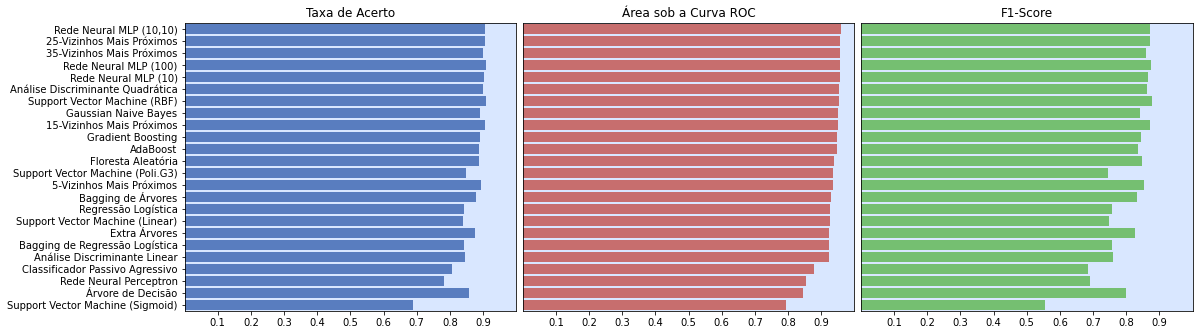

In [ ]:
#Gráficos relevantes
sns.set_color_codes("muted")
bgcolor = '#d9e7ff'
ticagem = [.1, .2, .3, .4, 0.5, .6,.7,.8,.9]
figura = plt.figure(figsize=(20,5)) 
figura.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.02, hspace=1)

plt.subplot(1, 3, 1)
plt.title('Taxa de Acerto')
acc = sns.barplot(x = resultados.iloc[:,0], y = resultados.index.values, color='b')
acc.axes.set_xlim([0, 1])
acc.xaxis.set_ticks(ticagem)
acc.set_facecolor(bgcolor)
plt.xlabel('')

plt.subplot(1, 3, 2)
plt.title('Área sob a Curva ROC')
auc = sns.barplot(x = resultados.iloc[:,1], y = resultados.index.values, color='r')
auc.axes.get_yaxis().set_visible(False)
auc.axes.set_xlim([0, 1])
auc.xaxis.set_ticks(ticagem)
auc.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 3, 3)
plt.title('F1-Score')
f1 = sns.barplot(x = resultados.iloc[:,2], y = resultados.index.values, color='g')
f1.axes.set_xlim([0, 1])
f1.xaxis.set_ticks(ticagem)
f1.axes.get_yaxis().set_visible(False)
f1.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('') 

plt.show()
figura.savefig('medidas.pdf')




Plotando o gráfico 1/24: 5-Vizinhos Mais Próximos

Plotando o gráfico 2/24: 15-Vizinhos Mais Próximos

Plotando o gráfico 3/24: 25-Vizinhos Mais Próximos

Plotando o gráfico 4/24: 35-Vizinhos Mais Próximos

Plotando o gráfico 5/24: Árvore de Decisão

Plotando o gráfico 6/24: Regressão Logística

Plotando o gráfico 7/24: Análise Discriminante Linear

Plotando o gráfico 8/24: Análise Discriminante Quadrática

Plotando o gráfico 9/24: Bagging de Árvores

Plotando o gráfico 10/24: Bagging de Regressão Logística

Plotando o gráfico 11/24: Floresta Aleatória

Plotando o gráfico 12/24: AdaBoost

Plotando o gráfico 13/24: Extra Árvores

Plotando o gráfico 14/24: Classificador Passivo Agressivo

Plotando o gráfico 15/24: Gradient Boosting

Plotando o gráfico 16/24: Gaussian Naive Bayes

Plotando o gráfico 17/24: Support Vector Machine (Linear)

Plotando o gráfico 18/24: Support Vector Machine (RBF)

Plotando o gráfico 19/24: Support Vector Machine (Poli.G3)

Plotando o gráfico 20/24: Support V

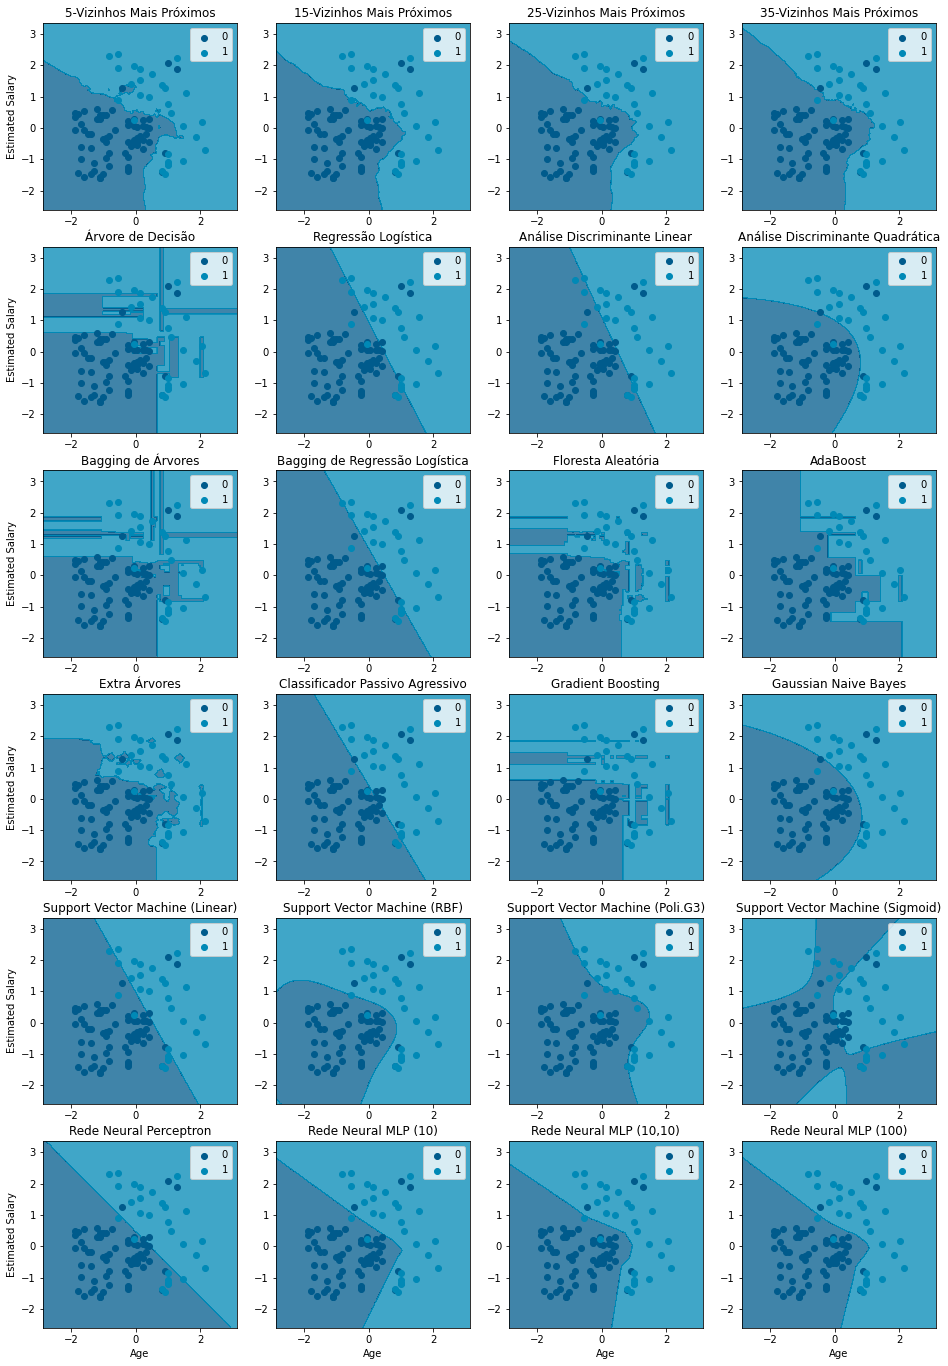

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
Xtreino, Xteste, ytreino, yteste = train_test_split(X, Y, test_size = 0.25 )       

# Plots das regioes de classificacao de cada método       
from matplotlib.colors import ListedColormap       
plt.figure(figsize=(16,24))

for k in range(len(classifiers)):
    print('\nPlotando o gráfico ' + str(k+1) + '/' + str(len(classifiers)) + ': ' + nome[k])
    plt.subplot(6, 4, k+1) 
    clf = classifiers[k]
    clf.fit(Xtreino, ytreino)
    X1, X2 = np.meshgrid(np.arange(start = Xteste[:, 0].min() - 1, stop = Xteste[:, 0].max() + 1, step = 0.01),
                         np.arange(start = Xteste[:, 1].min() - 1, stop = Xteste[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('#005b8c', '#0089b6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(yteste)):
        plt.scatter(Xteste[yteste == j, 0], Xteste[yteste == j, 1],
                    c = ListedColormap(('#005b8c', '#0089b6'))(i), label = j)
    plt.title(nome[k])
    if k >= 20 :
        plt.xlabel('Age')
    if k in range(0, 21, 4):
        plt.ylabel('Estimated Salary')
    plt.legend()
plt.savefig("regioes.pdf", bbox_inches = 'tight')
plt.show() 

 






